# <span style="color: blue"> Week 1 Class Demo</span>

# 1. Learn about language model tokenization
## 1.1 Tokenizer
Tokenization is a fundamental process in NLP that breaks down text into smaller units called tokens. These tokens serve as building blocks for various NLP tasks, including language modeling, text classification, sentiment analysis, and machine translation.<br>
Visit the tokenizer link from OpenAI to study how words are tokenized. <br>
[Click for Tokenizer Link](https://platform.openai.com/tokenizer)

## 1.2 Tiktoken
When using LLMs, they normally charge by token number usage. So, it is good even before a call to the LLMs, you have an estimation about the token numbers of your prompts, or knowledge base data. 
The following is an example to show how to count tokens using *tiktoken*, an OpenAI open source tokenizer.

### 1.2.1. Install tiktoken

In [2]:
%pip install --upgrade tiktoken

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


### 1.2.2 Import tiktoken

In [3]:
import tiktoken

### 1.2.3 Load an encoding
If you need more information about encoding base for different model of GPT, you could click to get the information.<br>
[Click to get different GPT model's encoding bases](https://github.com/openai/tiktoken/blob/main/tiktoken/model.py)

In [4]:
encoding = tiktoken.get_encoding("o200k_base")
#encoding = tiktoken.get_encoding("r50k_base")

**You could alternatively use tiktoken.encoding_for_model() to automatically load the correct encoding for a given model name.**

In [5]:
#encoding = tiktoken.encoding_for_model("gpt-4o")

## 1.2.4 Turn text into tokens with encoding.encode()

The `.encode()` method converts a text string into a list of token integers.

In [6]:
words = "I am interested in taking a course on Natural Language Processing (NLP) to learn how to effectively utilize Large Language Models (LLMs) for assistance. Within the next 11 weeks, my goal is to develop and present my own ChatBot."
word_len = len(words.split())
print(word_len)

39


**Now, let's see what is the encoded result.**

In [7]:
encoded = encoding.encode(words)
print("The encoded result is: ", encoded)

The encoded result is:  [40, 939, 9445, 306, 6167, 261, 4165, 402, 23735, 20333, 44532, 350, 45, 19318, 8, 316, 4484, 1495, 316, 18130, 24570, 27976, 20333, 50258, 350, 7454, 25153, 8, 395, 14647, 13, 35552, 290, 2613, 220, 994, 7449, 11, 922, 8583, 382, 316, 2575, 326, 3333, 922, 2316, 17554, 25814, 13]


## 1.2.5 Let's find out the encoded length and the **word:token ratio**

In [8]:
print("Length of token: ", len(encoded))
print("Word: token ratio is: ", word_len/len(encoded))

Length of token:  50
Word: token ratio is:  0.78


# 2. Environment Preparation
        !pip install python-dotenv
        !pip install openai

In [9]:
!pip install python-dotenv
!pip install numpy
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install openai


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip3 install scikit-learn
!pip3 install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Use the python command to load your .env file if it is not located at the working directory, the Jupyter Notebook working directory.

`
    load_dotenv(dotenv_path="C:/path/to/your/.env")
`

In [12]:
import numpy as np
from sklearn.manifold import TSNE
from ast import literal_eval
import matplotlib.pyplot as plt
import re

import os
from dotenv import load_dotenv

In [15]:
load_dotenv("C:\Study\CMPE297\Homework\Week1\w1.env")

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Danny Lam\AppData\Local\Temp\ipykernel_22408\1159843725.py:1: SyntaxWarning: invalid escape sequence '\S'
  load_dotenv("C:\Study\CMPE297\Homework\Week1\w1.env")


True

In [16]:
from openai import OpenAI
client = OpenAI()

In [ ]:
#load the OPENAI_API_KEY
api_key = os.getenv("OPENAI_API_KEY")
print(api_key)

# 3. Embeddings

In [10]:
words = [\
"man", "woman", "boy", "person", "gentleman", "male", "female", "human", "guy", "lad", "girl", "adult", "youth", \
"child", "husband", "father", "son", "brother", "uncle", "nephew", "grandfather", "kid", "teenager",  "lad", "teen",\

"apple", "orange", "banana", "pear", "fruit", "grape", "cherry", "strawberry", "peach", "plum", "berry", "lemon", "kiwi", "melon",\
"pineapple", "mango", "grapefruit", "watermelon", "raspberry", "blueberry", "pomegranate", "apricot", \
"lime", "nectarine", "tangerine", "papaya", "guava", "blackberry", "cranberry", "orchard",

        
"bank", "finance", "money", "river", "loan", "deposit", "credit", "financial", "institution", "savings", "account", "lender", \
"mortgage", "cash", "fund", "investment", "shore", "riverbank", "banking", "currency", "debit", "vault", "commerce", "transaction", \
"capital", "wealth", "brokerage", "riverside", "economy", "teller",

   

]

#words = ["king", "man", "woman", "queen"]

In [11]:
len(words)

85

In [12]:
model="text-embedding-3-small"

res = client.embeddings.create(input = ["man"], model=model)

In [13]:
res.data[0].embedding[:10]

[0.038761477917432785,
 0.00038446576218120754,
 0.016608253121376038,
 0.023912686854600906,
 -0.00939712580293417,
 -0.05896863341331482,
 -0.009657046757638454,
 0.007844267413020134,
 -0.002955762669444084,
 -0.02369941771030426]

In [14]:
len(res.data[0].embedding)

1536

**We could do embedding not only for a word, but for a sentence or paragraph.**

In [15]:
def get_embedding(text, model="text-embedding-3-small"):
   text = text.replace("\n", " ")
   return client.embeddings.create(input = [text], model=model).data[0].embedding

In [16]:
get_embedding('man')

[0.038752373307943344,
 0.0004125607665628195,
 0.01661578007042408,
 0.023923523724079132,
 -0.009394717402756214,
 -0.05899535492062569,
 -0.009674758650362492,
 0.007867825217545033,
 -0.0029671036172658205,
 -0.02372349426150322,
 0.012188461609184742,
 0.007614454720169306,
 -0.008427907712757587,
 -0.022456640377640724,
 0.015135562978684902,
 0.006350935436785221,
 -0.04675355181097984,
 -0.02813747711479664,
 0.014842186123132706,
 0.012781882658600807,
 0.02596382424235344,
 0.0525677427649498,
 0.015842333436012268,
 -0.01706918142735958,
 -0.051980990916490555,
 0.042912986129522324,
 -0.026790613308548927,
 0.03528519719839096,
 0.035205185413360596,
 -0.02776408940553665,
 0.010974950157105923,
 -0.02792411297559738,
 0.011655050329864025,
 -0.02388351783156395,
 0.0230833999812603,
 0.008827966637909412,
 0.010014808736741543,
 -0.020563028752803802,
 -0.0059875487349927425,
 -0.015375598333775997,
 -0.038592349737882614,
 -0.04582008346915245,
 0.005067413207143545,
 -0.

In [17]:
embed_model = "text-embedding-3-small"

res = client.embeddings.create(
    input= words, model=embed_model
)

In [ ]:
#res

In [18]:
len(res.data)

85

In [19]:
len(res.data[0].embedding)

1536

In [20]:
res.data[0].embedding[0:10]

[0.038761477917432785,
 0.00038446576218120754,
 0.016608253121376038,
 0.023912686854600906,
 -0.00939712580293417,
 -0.05896863341331482,
 -0.009657046757638454,
 0.007844267413020134,
 -0.002955762669444084,
 -0.02369941771030426]

In [21]:
e_words = []

for i in range(len(words)):
    e_words.append(res.data[i].embedding)

In [22]:
len(e_words)

85

In [23]:
e_words_np = np.array(e_words)

e_words_np.shape

(85, 1536)

In [24]:
# Create tsne object which will reduce data to 2 dimensions
tsne = TSNE(n_components=2, perplexity=5)

In [25]:
e_words_2d = tsne.fit_transform(e_words_np)

In [26]:
e_words_2d.shape

(85, 2)

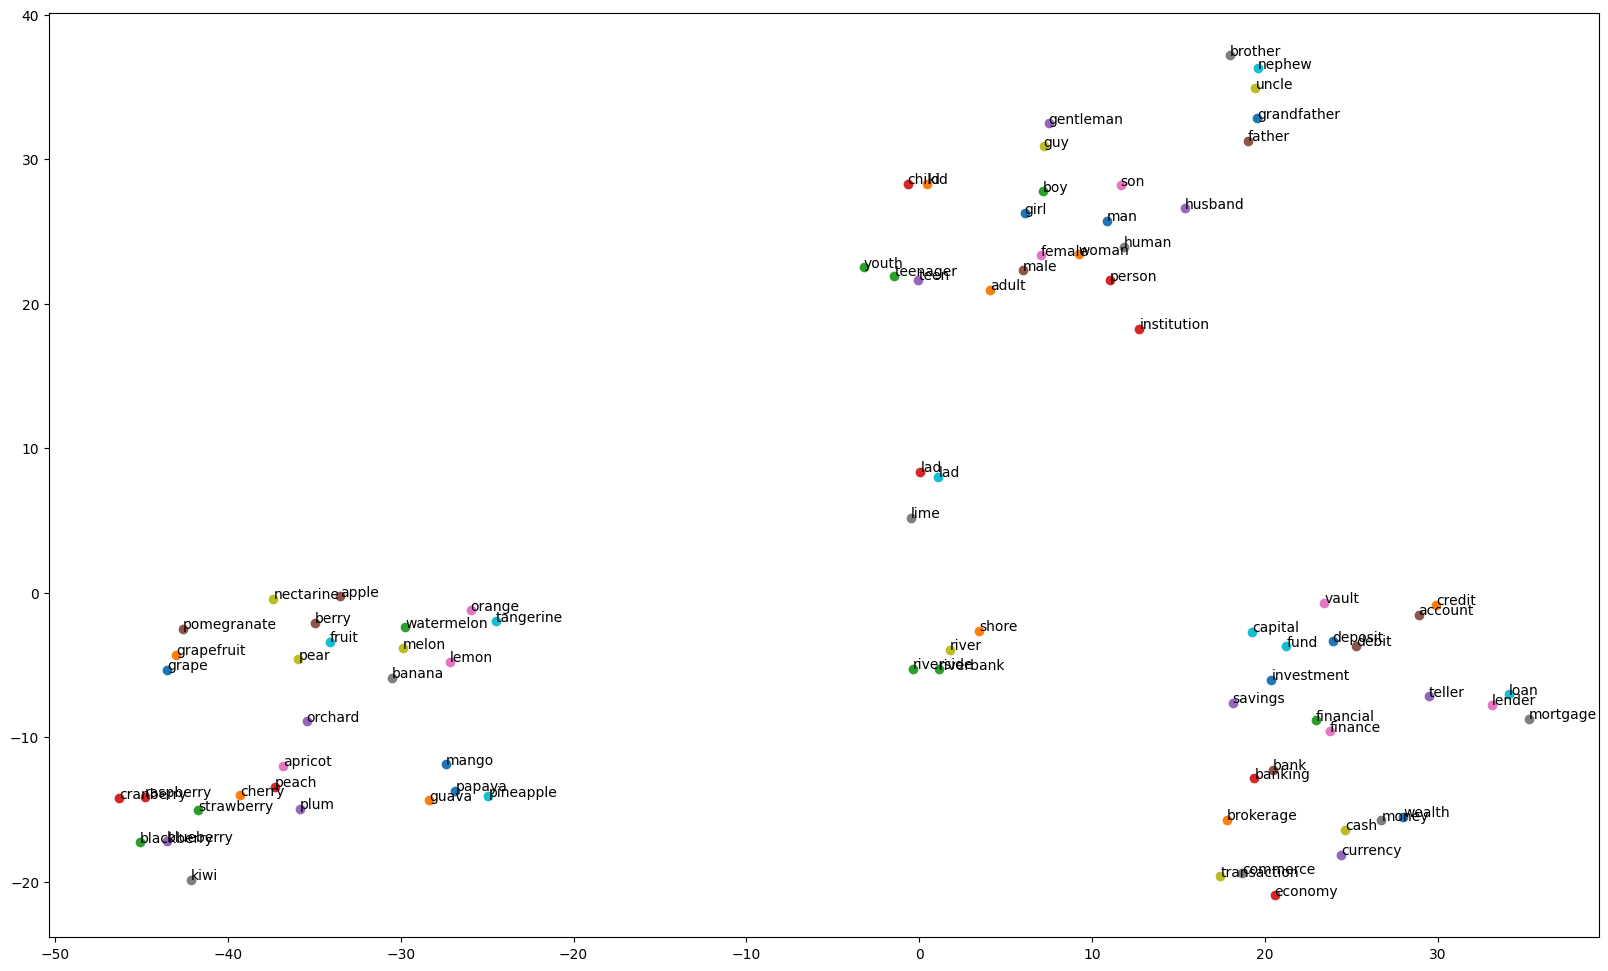

In [27]:
plt.figure(figsize=(20, 12))

for i in range (len(words)):
    plt.scatter(e_words_2d[i,0], e_words_2d[i,1])

# Add annotations
for i in range(len(words)):
    plt.annotate(words[i], (e_words_2d[i][0], e_words_2d[i][1]))

plt.show()

# 4. Using Large Lanaguage Model (LLM) OpenAI GPT

## 4.1 Install openai Python library if not yet
```python
!pip install openai
```

In [ ]:
!pip install openai

In [28]:
import os
from dotenv import load_dotenv

import openai
from openai import OpenAI

In [29]:
load_dotenv()

True

In [30]:
client = OpenAI()

## 4.2. Call the openai API
We will first have an Chat Completions example and then move to focus on the Responses API. We can use ***gpt-5*** or ***gpt-5-mini***, the latter being about one-fifth the cost. However, there are some instances where people may still utilize older models like instruct completions, for instance, ***text-davinci-003,*** which have distinct API interfaces. To streamline the process, we have also developed a helper function that makes API calls more convenient.



### 4.2.1 The following is a "Chat Completions API" example

- model: the name of the model you want to use (e.g., gpt-5, gpt-5-mini, gpt-4o, gpt-4o-mini, etc.). 

In [31]:
response = client.chat.completions.create(
    model="gpt-5-mini",
    messages=[
        {"role": "developer", "content": "You are a helpful assistant."},        
        {"role": "user", "content": "Knock knock."},
        {"role": "assistant", "content": "Who is there?"},
        {"role": "user", "content": "Michael."}
    ]
)

print(response.choices[0].message.content)

Michael who?


### 4.2.2 The following is an example to manually manage conversation state using responses API

In [32]:
response = client.responses.create(
    model="gpt-5-mini",
    instructions="You are a helpful assistant.",
    input=[
        {"role": "user", "content": "knock knock."},
        {"role": "assistant", "content": "Who's there?"},
        {"role": "user", "content": "Michael."},
    ],
)

print(response.output_text)

Michael who?
